In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')

In [4]:
fruits_2d = fruits.reshape(-1, 100 * 100)

In [5]:
# 차원 축소 : 차원 = 특성 갯수
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [6]:
pca.components_.shape

(50, 10000)

In [9]:
# 10행 10열로 과일 이미지를 출력하는 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1): #arr : 과일 이미지 데이터 배열, ratio : 확대 비율
    # 총 샘플의 갯수
    total = len(arr)
    # 총 행수
    rows = int(np.ceil(total / 10))
    # 한 행당 열의 갯수
    cols = total if rows < 2 else 10 # 1행일때는 전체 갯수, 그 이상일때는 10개로 갯수 고정

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            cur = i *10 + j
            if  cur < total:
                axs[i, j].imshow(arr[cur], cmap='gray_r')
    plt.show()

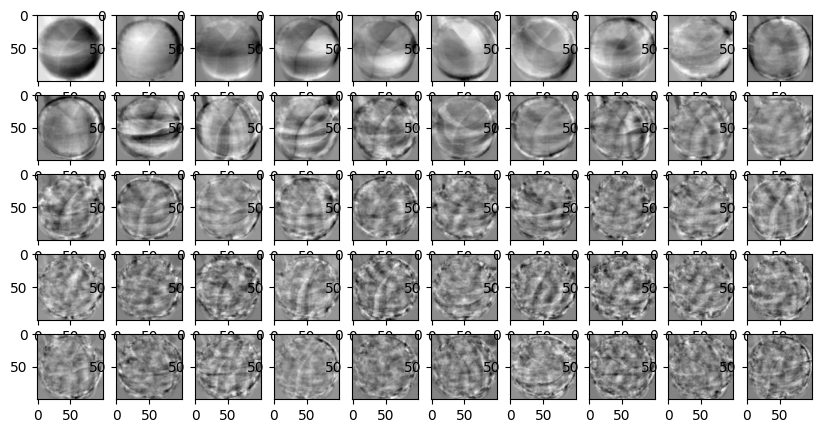

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
fruits_2d.shape

(300, 10000)

In [12]:
fruits_pca = pca.transform(fruits_2d) # 10000 차원 -> 50차원
fruits_pca.shape

(300, 50)

In [13]:
# 원본 데이터로 복구 50차원 -> 10000 차원
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

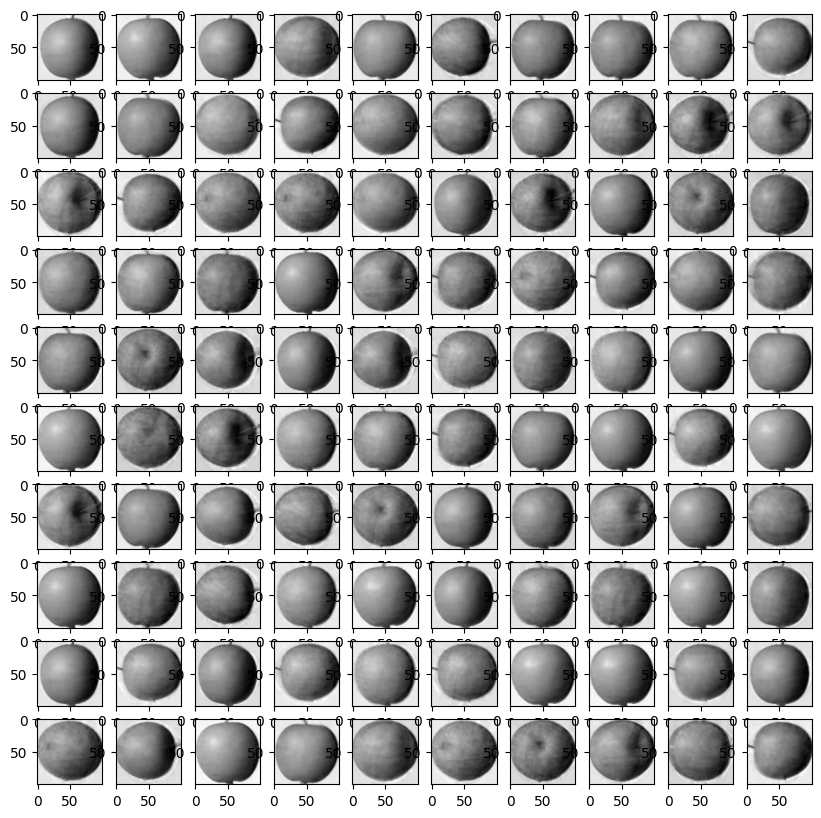

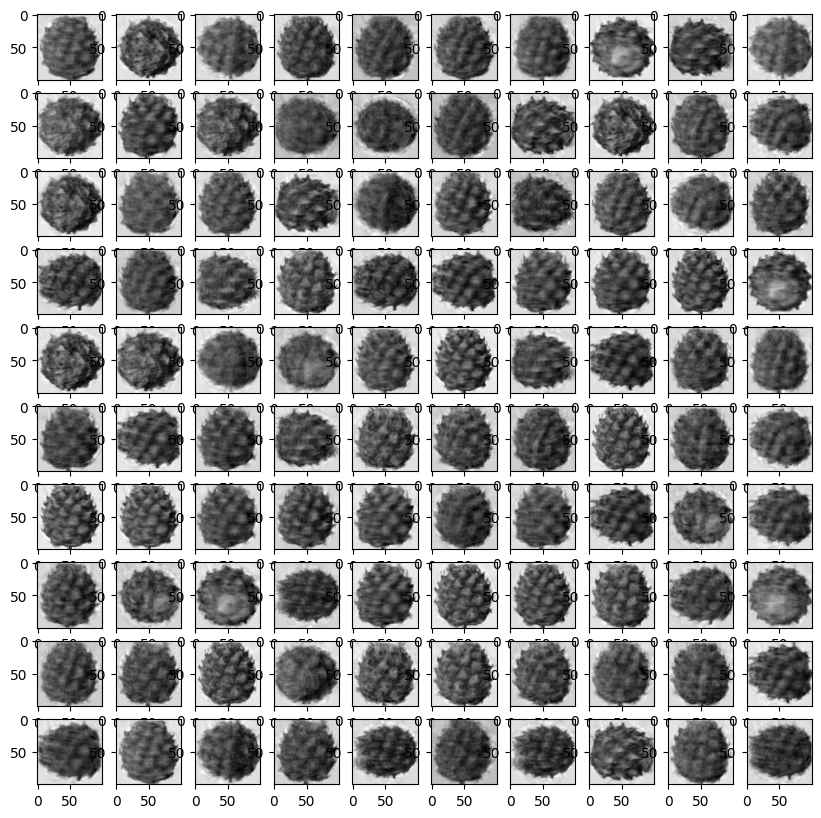

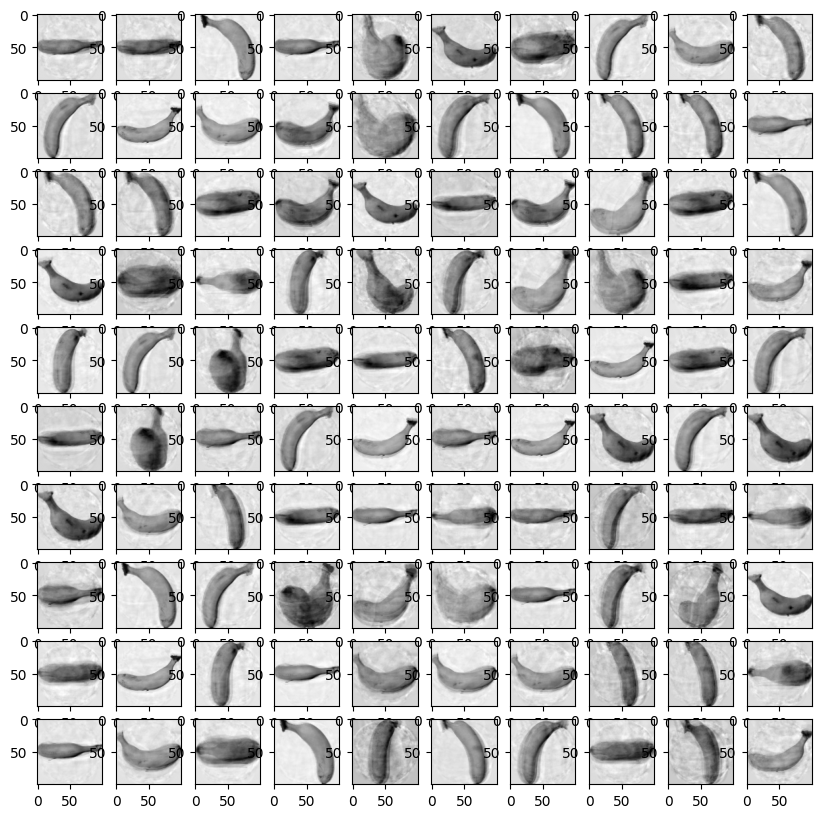

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for i in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[i:i+100])

In [ ]:
# 설명된 분산, 주성분이 원본 데이터를 얼마만큼 설명할 수 있는지(복구 가능 비율)
# 결과값 확인 -> 92% 정도 복구
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215809750598133)

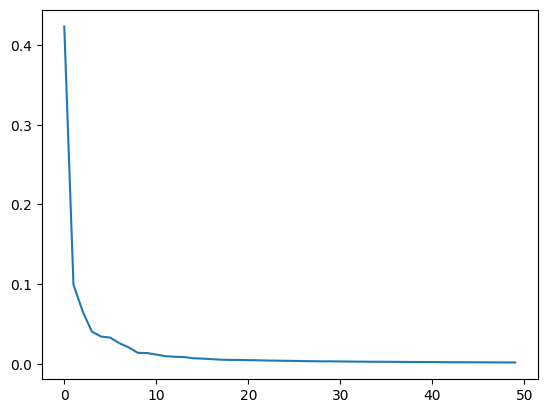

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [17]:
target = np.array([0] * 100 + [1] *100 + [2] * 100)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [19]:
lr = LogisticRegression()
cv = cross_validate(lr, fruits_2d, target)
print("걸린 시간 : ", np.mean(cv['fit_time']))
print("정확도 : ", np.mean(cv['test_score']))

걸린 시간 :  0.3414022445678711
정확도 :  0.9966666666666667
